In [2]:
import pandas as pd #ипортируем библиотеку пандас
import scipy.stats as st #Ипортируем библиотеку для проверки гипотез.
import matplotlib.pyplot as plt #ипортируем библиотеку Matplotlib для построения графиков
import numpy as np #Импортируем библиотеку Numpy

Название проекта :Анализ сервиса аренды самокатов GoFast

Цель выполнения проекта является: анализ данных и проверка  гипотез, которые могут помочь бизнесу вырасти.
Составим план выполнения работ:
Шаг 1. Загрузим данные
1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы: users,rides,subscriptions. Пути к файлам:
/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv
1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.
Шаг 2. Предобработаем данные
2.1 Приведём столбец date к типу даты pandas.
2.2 Создадим новый столбец с номером месяца на основе столбца date.
2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.
Шаг 3. Исследовательский анализ данных
Опишем и визуализируем общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.
Шаг 4. Объединеним данные
4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().
4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
Шаг 5. Подсчетаем выручку
5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.
Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

Добавим описание данных для удобства:
В основных данных есть информация о пользователях, их поездках и подписках.
 Пользователи — users_go.csv
user_id	уникальный идентификатор пользователя
name	имя пользователя
age	возраст
city	город
subscription_type	тип подписки (free, ultra)
Поездки — rides_go.csv
user_id	уникальный идентификатор пользователя
distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date	дата совершения поездки
Подписки — subscriptions_go.csv
subscription_type	тип подписки
minute_price	стоимость одной минуты поездки по данной подписке
start_ride_price	стоимость начала поездки
subscription_fee	стоимость ежемесячного платежа


#### Шаг 1. Загрузка данных

In [3]:
# Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы: users,rides,subscriptions.
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
#Выведем первые строки первых 5 строк , 3х наших датафреймов, также выведем .info и .describe() для каждого датафрейма
#users
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
#rides 
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
#subscription
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [11]:
rides.describe()


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [12]:
subscriptions.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Вывод:
users :1565 cтрок, 5 столбцов
rides:18068 строк , 5 столбцов 
subscriptions : 2 столбца, 4 строчки.
Можем понять примерное представление о датасетах,например средний и максимальный возвраст пользователей)
Можем обратить внимание на dtype.
Оценить масштабность и объём работы.
Оценили количество строк и столбцов для контроля дальнейшего соеднения датасетов.

#### Шаг 2. Предобработка данных

Предобработка данных : начнём со столбца date в датасете rides, приведём к типу даты pandas

In [13]:
rides['date']=pd.to_datetime(rides['date'] ,format='%Y-%m-%dT%H:%M:%S')
#Проверяем 
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создадим новый столбец с номером месяца на основе столбца date.

In [14]:
rides['month'] = rides['date'].dt.month
# Проверяем
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [15]:
#Выведем последние строки дата сета для определения периода данных.
rides.tail()

,user_id,distance,duration,date,month
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11
18067,1534,2371.711192,15.893917,2021-12-29,12


Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют. 

In [16]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

В датасете users пропуски отсутствуют

In [17]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

В датасете rides пропуски отсутствуют

In [18]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим наличие дубликатов в датасетах, при нахождении дубликатов удалим их.

In [19]:
users.duplicated().sum() #кол-во дубликатов для users

31

In [20]:
users.drop_duplicates(inplace=True) # Удаляем дубликаты с параметром inplace=True ( Здесь и сейчас)

In [21]:
users.duplicated().sum() # проверяем наличие дубликатов

0

In [22]:
rides.duplicated().sum() #Проверяем дубликаты для rides 

0

Дубликаты отсутствуют

In [23]:
subscriptions.duplicated().sum() # Проверяем дубликаты для subscriptions

0

Дубликаты отсутствуют

в датасете subscriptions пропуски отсутствуют


Вывод:
В представленных датасетах отсутствуют пропуски, можем предположить, что данные были предобработаны для анализа.
Обнаружены дубликаты в датасете users , 31 дубликат, удалили с помощью команды drop_duplicates. В остальных датасетах дубликаты отсутствуют

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

In [24]:
# частота встречаемости городов,датасет users столбец city:
#Рассмотрим уникальные значения в столбце
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [25]:
# Представим столбец city из датасета users в форме таблицы.
table_city = users['city'].value_counts()
table_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

<AxesSubplot:title={'center':'Кол-во пользователей по городам'}, xlabel='Город', ylabel='Кол-во пользователей'>

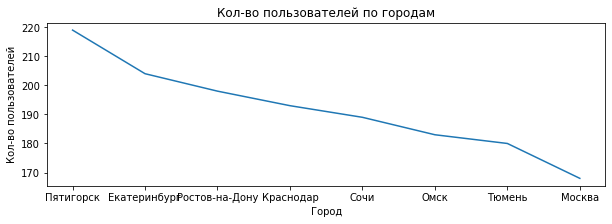

In [26]:
users['city'].value_counts().plot(title='Кол-во пользователей по городам',xlabel='Город',ylabel='Кол-во пользователей',figsize=(10,3))

По столбцу city в датафрейме users мы можем скзаать , что количество городов присутствия = 8 , самая высокая активность пользователей в городе Пятигорск.

array([835, 699])

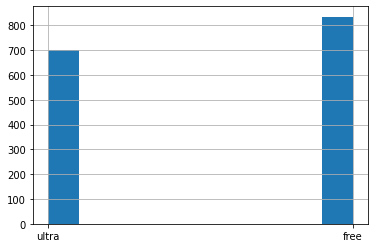

In [27]:
# соотношение пользователей с подпиской и без подписки
#датасет
users['subscription_type'].hist()
users['subscription_type'].value_counts().unique()

users_subscribe = ['subscription_type'].value_counts().unique()

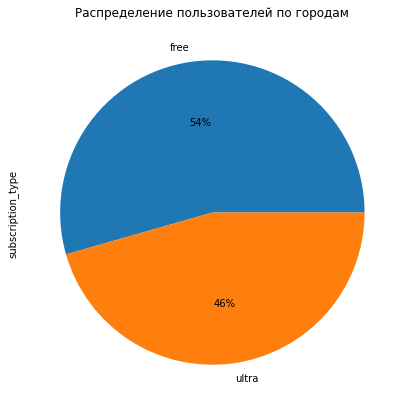

In [28]:
users['subscription_type'].value_counts().plot(kind = 'pie', y = 'users_subscribe',autopct = '%1.0f%%',figsize=(7,7), title = 'Распределение пользователей по городам');

По столбцу subscription_type датафрейма users можем сделать вывод , количество пользователей без подписок, больше количества пользователей с подпиской. Без подписки 846, с подпиской 719.

<AxesSubplot:>

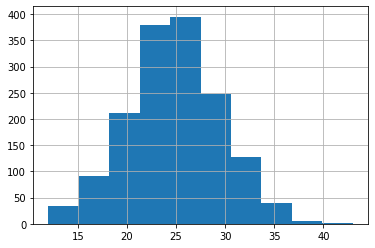

In [29]:
#Возраст пользователей, #столбец age датафрейма users:
users['age'].hist()

По гистограмме мы можем сделать вывод, что большинство пользователей в возврасте от ~22 до ~27 лет.

In [30]:
#Проверим с помощью команды .mean (среднее составляет 24.9)
users['age'].mean()

24.903520208604956

In [31]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<AxesSubplot:>

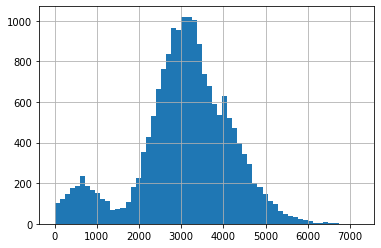

In [32]:
#расстояние, которое пользователь преодолел за одну поездку
#столбец distance датафрейма rides, т.к одна строчка является одной поездкой , рассмотрим гистограмму по столбцу.
rides['distance'].hist(bins=60)


Рассматривая гистограмму видим, что в большинстве случаев пользователи проезжают расстояние от 2900 м! до 3500м.

In [33]:
#Проверим с помощью .mean()
rides['distance'].mean() 

3070.6599756818814

<AxesSubplot:>

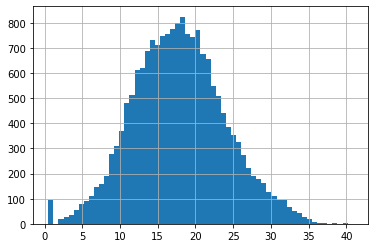

In [34]:
# Продолжительность поездок ,столбец duration датафрейма rides: т.к каждая поездка это строка: построим гистограмму по столбцу
rides['duration'].hist(bins=60) 

Увеличев параметр bins мы увидели странный пик около 0 примерно до 100

<AxesSubplot:>

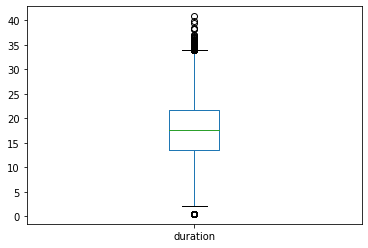

In [35]:
#Создадим ящик с "усами"
rides['duration'].plot(kind='box')

Судя по усам можем предположить что всё что выше 35 и ниже ~ 3 является выбросами.

In [36]:
#Проверим mean
rides['duration'].mean()

17.80501119798444

Большинство поездок занимает 13-21 минут, среднее в 17.8 это подтверждает.

p.s если сопоставить среднее поездки и среднее время продолжительности поездок, 3 км за 17 минут - время на старт/завершение получим что-то около 15/3 = 5км/ч.
p.ps просто мои рассуждения касаемо реалистичности данных))

Вывод: Мы визуализировали интересующие нас данные : 8 городов присутствия, большинство пользователей без подписки,средний возвраст 22-27 лет, среднее расстояние пройденно на самокате 3000м,среднее время поездки 17 минут.

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge(). Объединённый датафрейм назовём data.

data = users.merge(rides, 'outer').merge(subscriptions, 'outer') #Перевёл в маркдаун

In [37]:
data = users.merge(rides, on='user_id') #Общее юсер айди
data = data.merge(subscriptions, on ='subscription_type') #общее субскрипшн тайп


In [38]:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [39]:
#Выведем info
data.info() #для объединённого датасета и сопоставим с изначальными данным.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки; с данными о пользователях с подпиской. Воспользуемся методом query()


Выполним "извлечение" по столбцу subscription_type , по значению "ultra' и 'free' датафрейма data.
Каждой из этих выборок присвоим новую переменную.

In [40]:
data_free = data.query('subscription_type == "free"')
#Сразу проверим
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [46]:
data_ultra = data.query('subscription_type == "ultra"')
#Сразу проверяем
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
Выведем на экран описательную статистику .describe() каждого столбца , для сравнения средних значений и медианы.

In [47]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [48]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Расстояние : Среднее значение совсем немного выше у пользователей с подпиской, у медианного значения разница ещё менее существенна. 


<AxesSubplot:>

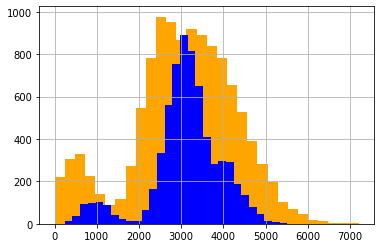

In [49]:
#Для наглядности построим гистограммы по показателям distance пользователей с подпиской и без. Пользователи без подписке на графике отображются оранжевыми линиями, с подпиской соответственно синим.
data_free['distance'].hist(bins=30,color='orange',)
data_ultra['distance'].hist(bins=30,color='blue')


<AxesSubplot:title={'center':'Расстояние пользователей с подпиской и без'}, xlabel='Расстояние(в метрах)', ylabel='Пользователи'>

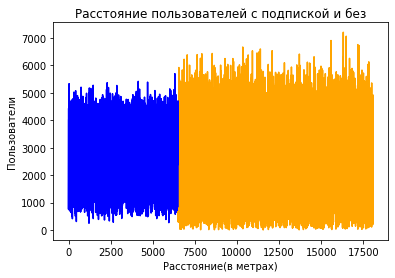

In [50]:
data_free['distance'].plot(color='orange',xlabel='Расстояние',ylabel='Пользователи',title='Расстояние пользователей с подпиской и без')
data_ultra['distance'].plot(color='blue',xlabel='Расстояние(в метрах)',ylabel='Пользователи')

Можем видеть что пользователи без подписки совершают более длинныеы поездки (+1000м)

Теперь рассмотрим столбец duration, время сессии.

In [51]:
data_free['duration'].describe()


count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [52]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

среднее и медиана одинаково для пользователей с подпиской и без, рассмотрим на гистограмме:

<AxesSubplot:>

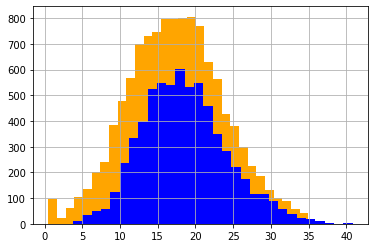

In [53]:
data_free['duration'].hist(bins=30,color='orange',)
data_ultra['duration'].hist(bins=30,color='blue')

<AxesSubplot:title={'center':'Время сессии пользователей с подпиской и без'}, xlabel='Время в минутах', ylabel='Кол-во пользователей'>

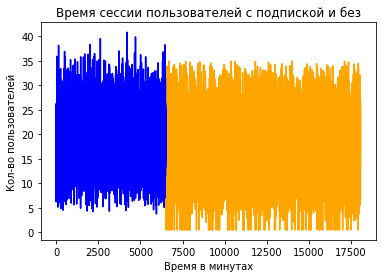

In [54]:
data_free['duration'].plot(color='orange',xlabel='Время в минутах',ylabel='Кол-во пользователей',title='Время сессии пользователей с подпиской и без')
data_ultra['duration'].plot(color='blue',xlabel='Время в минутах',ylabel='Кол-во пользователей')

Люди без подписки тратят больше времени на сессию, это безусловно связано с большим рассстоянием , пройденным пользователями без подписки ultra.

Вывод :Пользователи без подписки проезжают большее расстояние , чем пользователи с подпиской ( тоесть ездят на самокате на более длинные расстояние, соответственно и время сессии пользователей без подписки выше,чем у пользователей с подпиской.

#### Шаг 5. Подсчёт выручки

Подсчетаем выручку. датасет с агрегированными данными это data. Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 

Помесячная выручка считается по формуле: стоимость старта поездки 
×
×  количество поездок 
+
+ стоимость одной минуты поездки 
×
× общая продолжительность всех поездок в минутах 
+
+ стоимость подписки.


Построим сводную таблицу с интересующими нас позициями:

In [55]:
# каждое значение из столбца duration округляется с помощью «потолка», согалсно задания:
data['duration'] = np.ceil(data['duration'])

In [56]:
end_data = data.pivot_table(index = ['user_id','month'],values = ['duration','distance','name','subscription_type','minute_price','start_ride_price','subscription_fee'],aggfunc ={'distance':'sum','name':'count','subscription_type':'max','duration':'sum','minute_price':'min','start_ride_price':'min','subscription_fee':'min'})                         

In [57]:
# Переименуем столбец name  в count_rides , будет показывать количество поездок в месяц.
end_data.rename(columns = {'name' : 'count_rides'}, inplace = True)

UPD: Добавили в сводную таблицу данные из subscruption.

In [58]:
end_data.head(10)

distance  duration  minute_price  count_rides  \
user_id month                                                      
1       1       7027.511294      42.0             6            2   
        4        754.159807       7.0             6            1   
        8       6723.470560      46.0             6            2   
        10      5809.911100      32.0             6            2   
        11      7003.499363      56.0             6            3   
        12      6751.629942      28.0             6            2   
2       3      10187.723006      63.0             6            3   
        4       6164.381824      40.0             6            2   
        6       3255.338202      14.0             6            1   
        7       6780.722964      48.0             6            2   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
        12                    0               199             ultra  
2       3                     0               199             ultra  
        4                     0               199             ultra  
        6                     0               199             ultra  
        7                     0               199             ultra

Теперь у нас имеются все данные для добавления столбца с помесячной выручкой. Назовём его monthly_revenue

(стоимость старта поездки × количество поездок)+ стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки

In [59]:
end_data['monthly_revenue'] = (end_data['start_ride_price'] * end_data['count_rides']) + end_data['minute_price'] * end_data['duration']+end_data['subscription_fee']

In [60]:
#Проверяем:
end_data.sample(15) #Выводим рандомные строки из таблтцы

,,distance,duration,minute_price,count_rides,start_ride_price,subscription_fee,subscription_type,monthly_revenue
user_id,month,,,,,,,,
541,6,5797.184140,35.0,6,2,0,199,ultra,409.0
676,3,3528.959013,20.0,6,1,0,199,ultra,319.0
1450,7,524.234915,10.0,8,1,50,0,free,130.0
1339,12,3094.554308,31.0,8,2,50,0,free,348.0
1464,6,2558.179248,10.0,8,1,50,0,free,130.0
846,6,10495.069558,69.0,8,3,50,0,free,702.0
952,2,6835.348746,51.0,8,2,50,0,free,508.0
227,5,3258.874126,16.0,6,1,0,199,ultra,295.0
825,3,5525.076456,37.0,8,2,50,0,free,396.0


Вывод : Создали сводную таблицу по параметрам необходимых для подчёта помесяной выручки (monthly_revenue) , далее по формуле произвели расчёт. Получили помесячную выручку на каждого пользователя, что и требовалось в задании.

#### Шаг 6. Проверка гипотез

Проверьте гипотезу. Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки:тратят ли пользователи с подпиской больше времени на поездки?
Исходные данные берём из датафрейма users:
Нулевая гипотеза будет : пользователи с подпиской тратят столько же времени как пользователи без подписки
Первая гипотеза будет : пользователи с подпиской тратят больше времени чем пользователи без подписки.


In [61]:
import scipy.stats as st #Ипортируем библиотеку для проверки гипотез.

In [62]:
ultra=data_ultra['duration'] #Время с подпиской)
free=data_free['duration'] #Время без подписки 
alpha = 0.05 # Задаём уровень значимости , по стандрарту
results = st.ttest_ind(ultra, free, alternative ='greater') #Проводим Ттест для двух выборок , гипотезу БОЛЬШЕ используем как альтернативную 
print('Среднее значение продолжтельности поездки с подспиской:',ultra.mean())
print('Среднее значение продолжтельности поездки без подписки:',free.mean())
print('pvalue =',results.pvalue) #Проверяем Pvalue
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение продолжтельности поездки с подспиской: 18.54198516280583
Среднее значение продолжтельности поездки без подписки: 17.39090929866399
pvalue = 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Можно отвергнуть нулевую гипотезу, есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени.

Следующая гипотеза: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку,равно 3130 метров? 
Нулевая гипотеза: Расстояние distance пользователей с подпиской ultra = 3130
Первая гипотеза: Расстояние distance пользователей с подпиской ultra > 3130метров

In [63]:
ultra_distance = data_ultra['distance']
interested_value = 3130 
alpha =0.05
result= st.ttest_1samp (ultra_distance,interested_value,alternative='greater')
print(result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Проверив данную гипотезу , мы не можем утверждать что  расстояние distance пользователей с подпиской превышает 3130 м.


Следующая гипотеза:Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Обратимся  к нашему итоговому датасету end_data , столбцу monthly_revenue
нулевая гипотеза : помесячная выручка с пользователей с подпиской = помесячной выручке с пользователей без подписки
1ая гипотеза: помесячная выручка с пользователей с подпиской выше (>) помесячной выручки с пользователей без подписки

In [64]:
ultra_monthly_revenue = end_data.loc[end_data.subscription_type == 'ultra', 'monthly_revenue'] 
free_monthly_revenue = end_data.loc[end_data.subscription_type == 'free','monthly_revenue']
result=st.ttest_ind(ultra_monthly_revenue,free_monthly_revenue,alternative = 'greater')
alpha=0.05
print('Среднее выручки для пользователей с подпиской:',ultra_monthly_revenue.mean())
print('Среднее выручки для пользователей с подпиской:',free_monthly_revenue.mean())
print(result.pvalue) # Выедем pvalue
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее выручки для пользователей с подпиской: 362.7921906022502
Среднее выручки для пользователей с подпиской: 328.6413651073845
1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, следовательно есть основания предпоагать что пользователи с подпиской приносят больше выручки , чем пользователи без подписки.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Гипотеза о равенстве средних для зависимых (парных) выборок
нулевая гипотеза:u1=u2
альтернативная гипотеза:u1>u2 ( имею ввиду , что количество обращений после станет меньше , чем было до )
метод  st.ttest_rel

Вывод : Мы отвергли две нулевых гипотезы , одну гипотезу отвергнуть не удалось.

Общий вывод: 
    В ходе выполнения работ мы выполнили работу по предобработке данных:
    начнали со столбца date в датасете rides, привели его к типу даты pandas
    извлекли из даты месяц( для дальнейшего получения помесячной выручки)
    проверили датасеты на присутствие пропусков (пропуска отсутствуют)
    Описали и визуализировали с помощью гистограмм общую информацию о пользователях и поездках:: 8 городов присутствия, большинство пользователей без подписки,средний возвраст 22-27 лет, среднее расстояние пройденно на самокате 3000м,среднее время поездки 17 минут.
    Далее мы объеденили датасеты , построили сводную таблицу с необходимыми нам данным для расчёта помесячной прибыли. Получили помесячную выручку на каждого пользователя, что и требовалось в задании.
    После этого работали с гипотезами.
    

Общий вывод:
Выполнили предобработку данных.
Проверили на наличие пропусков
Обработали дубликаты 
Произвели исследовательский анализ данных.
Визуализировали данные : количество городов присутствия : 8 , самая высокая активность пользователей в городе Пятигорск.
Выяснили что 54 % пользователей без используют приложение без платной подписки , 46 % используют подписку.
Средний возвраст пользователей составляет 25 лет
В среднем пользователи проезжают 3000м (3км)
Среднее время сессии 18 минут 
Затем выполнили объеденение данных.
Визуализировали пройденное расстояние и время сессий пользователей с подпиской и без.
Пользователи без подписки проезжают большее расстояние , чем пользователи с подпиской ( тоесть ездят на самокате на более длинные расстояние, соответственно и время сессии пользователей без подписки выше,чем у пользователей с подпиской
С помощью сводной таблицы посчитали помесячную выручку на каждого пользователя.

  Мы разобрали 3 гипотезы : 
Можно предполагать что пользователи с подпиской тратят в приложении больше времени.
Мы не можем утверждать , что расстояние пройденное пользователями с подпиской больше чем расстояние пройденное пользователями без подписки
Есть основания предпоагать что пользователи с подпиской приносят больше выручки , чем пользователи без подписки.
                                                                                       
                                                                                       
